# Install Repository

In [ ]:
#Run this block to check GPU you've been assigned
!nvidia-smi

In [ ]:
#first time run
!git clone https://github.com/antonioverdi/MLReproChallenge.git
#At the moment all requirements are met by Google Colab already I believe
import os
os.chdir("MLReproChallenge")
!pip install -r requirements.txt

In [ ]:
#subsequent runs
!git pull
!pip install -r requirements.txt

# Train Models
### main.py Arguments
<table>
    <tr><th>Argument</th><th>Default</th><th>help</th></tr>
    <tr><td>--arch, - a</td><td>str: 'resnet56'</td><td>model architecture</td></tr>
    <tr><td>-j, --workers</td><td>int: 4</td><td>number of data loading workers</td></tr>
    <tr><td>--epochs</td><td>int: 182</td><td>number of total epochs to run</td></tr>
    <tr><td>--start-epoch</td><td>int: 0</td><td>manual epoch number, for restarts</td></tr>
    <tr><td>-b, --batch-size</td><td>int: 128</td><td>mini-batch size</td></tr>
    <tr><td>--lr, --learning-rate</td><td>float: 0.1</td><td>initial learning rate</td></tr>
    <tr><td>--momentum</td><td>float: 0.9</td><td>momentum</td></tr>
    <tr><td>--weight-decay, --wd</td><td>float: 2e-4</td><td>weight decay</td></tr>
    <tr><td>--print-freq, -p</td><td>int: 50</td><td>print frequency</td></tr>
    <tr><td>--resume</td><td>str: ' '</td><td>path to latest checkpoint</td></tr>
    <tr><td>-e, --evaluate</td><td>bool: False</td><td>evaluate model on validation set</td></tr>
    <tr><td>--pretrained</td><td>bool: False</td><td>use pre-trained model</td></tr>
    <tr><td>--half</td><td>bool: False</td><td>use half-precision float(16-bit)</td></tr>
    <tr><td>--save-dir</td><td>str: 'save_temp'</td><td>Directory used to save trained models</td></tr>
    <tr><td>--save-every</td><td>int: 10</td><td>Save checkpoint at every specified number of epochs</td></tr>
    <tr><td>--colab</td><td>bool: False</td><td>Set this to true when running in Google Colab</td></tr>
    <tr><td>--snip</td><td>bool: False</td><td>Set this to true to run SNIP experiments</td></tr>
    <tr><td>--snip_compression</td><td>float: 0.5</td><td>eg. compression of 0.25 retains 25 percent of weights</td></tr>
   </table>

In [ ]:
!python main.py --save-dir="<experiment_name>"

In [ ]:
from google.colab import files
!zip -r <experiment_name>.zip <experiment_name>
files.download("<experiment_name>.zip")

# Test Models & Graph
### test.py Arguments
(currently no arguments. test.py needs to be made more colab friendly)
<table>
    <tr><th>Argument</th><th>Default</th><th>help</th></tr>
    <tr><td>--arch, - a</td><td>str: 'resnet56'</td><td>model architecture</td></tr>
    <tr><td>--model_dir</td><td>str: 'trained_models'</td><td>directory to get pretrained models from</td></tr>
    <tr><td>--log_dir</td><td>str: 'accuracy_logs.json'</td><td>path to save the accuracy json file</td></tr>
   </table>

In [2]:
from plot_utils import create_plots

In [ ]:
!python test.py

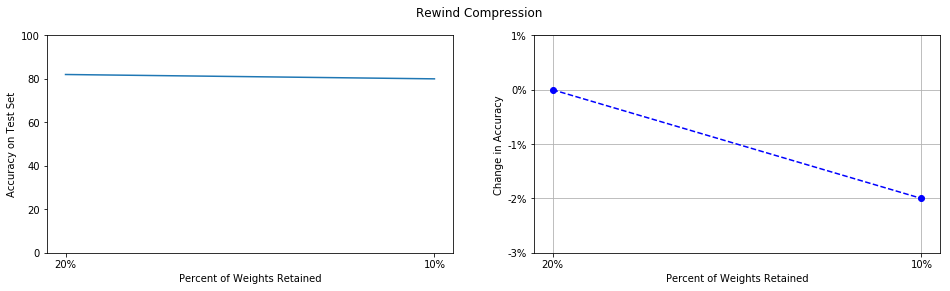

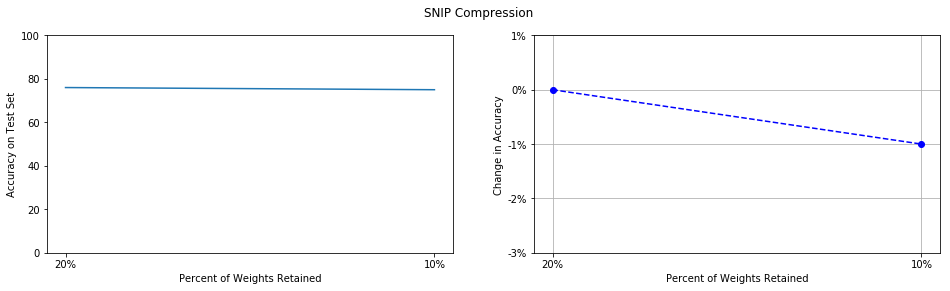

In [3]:
compressions = ['100', '080','040', '020', '010']
create_plots('logs.json', compressions[-2:])

<h4>SNIP experiments</h4>

In [ ]:
!python main.py --colab --snip --arch="resnet56_snip" --save-dir="SNIP_checkpoints" --save-every=25

In [9]:
import resnet
import os
import torch

In [18]:
model = resnet.resnet56().to('cpu')
model_dir = "trained_models"
prune_style = "SNIP010"
filename = model_dir + os.sep + prune_style + ".th"
print("Testing Model: {} from {}".format(prune_style, filename))
pretrained = torch.load(filename, map_location=torch.device('cpu'))
model.load_state_dict(pretrained, strict=False)
model.eval();

Testing Model: SNIP010 from trained_models\SNIP010.th
